# ДЗ по "Библиотеки Python для Data Science: Numpy, Matplotlib, Scikit-learn"
##  Видеоурок 6. Обучение с учителем в Scikit-learn.
* Домашнее задание:  
[Практическое задание](https://gbcdn.mrgcdn.ru/uploads/asset/5788496/attachment/d8fe09d4348597c3d8cf86f8d459dc5d.pdf).

## Тема “Обучение с учителем””

In [418]:
# Устанавливаем пакеты есои они не установлены
# !pip install pandas
# !pip install matplotlib
# !pip install numpy
# !pip install scikit-learn

### Задание 1
- Импортируйте библиотеки `pandas` и `numpy`.
- Загрузите `Boston House Prices dataset` из встроенных наборов данных библиотеки `sklearn`.
- Разбейте эти датафреймы на тренировочные (`X_train`, `y_train`) и тестовые (`X_test`, `y_test`) с помощью функции `train_test_split` так, чтобы размер тестовой выборки составлял 30% от всех данных, при этом аргумент `random state` должен быть равен 42.
- Создайте модель линейной регрессии под названием `lr` с помощью класса `LinearRegression` из модуля `sklearn.linear_model`.
- Обучите модель на тренировочных данных (используйте все признаки) и сделайте предсказание на тестовых.

In [419]:
# Загружаем необходимые библиотеки
import numpy as np
import pandas as pd

# Уберем warnings
import warnings
warnings.filterwarnings('ignore')

В новых версиях `scikit-learn` нет датасета `boston`, но хочется воспользоваться последней версией `scikit-learn`. Поэтому воспользуемся [инструкцией](https://scikit-learn.org/1.0/modules/generated/sklearn.datasets.load_boston.html) приведённой на официальном сайте.

In [420]:
# Загрузим датасет Boston
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
# Название фичей
feature_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
# Преобразуем его в датафрейм
# Фичи
X = pd.DataFrame(data, columns=feature_names)
# Таргет
y = pd.DataFrame(target, columns=['price'])

In [421]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [422]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [423]:
y.head()

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [424]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   506 non-null    float64
dtypes: float64(1)
memory usage: 4.1 KB


In [425]:
# Модуль для зазбиения выборки на тренировочнию и тестовую
from sklearn.model_selection import train_test_split

# Разобьём выборку на тренировочную (70%) и тестовую (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [426]:
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
116,0.13158,0.0,10.01,0.0,0.547,6.176,72.5,2.7301,6.0,432.0,17.8,393.30,12.04
45,0.17142,0.0,6.91,0.0,0.448,5.682,33.8,5.1004,3.0,233.0,17.9,396.90,10.21
16,1.05393,0.0,8.14,0.0,0.538,5.935,29.3,4.4986,4.0,307.0,21.0,386.85,6.58
468,15.57570,0.0,18.10,0.0,0.580,5.926,71.0,2.9084,24.0,666.0,20.2,368.74,18.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.17120,0.0,8.56,0.0,0.520,5.836,91.9,2.2110,5.0,384.0,20.9,395.67,18.66
270,0.29916,20.0,6.96,0.0,0.464,5.856,42.1,4.4290,3.0,223.0,18.6,388.65,13.00
348,0.01501,80.0,2.01,0.0,0.435,6.635,29.7,8.3440,4.0,280.0,17.0,390.94,5.99
435,11.16040,0.0,18.10,0.0,0.740,6.629,94.6,2.1247,24.0,666.0,20.2,109.85,23.27


In [427]:
# Модуль линейной регрессии
from sklearn.linear_model import LinearRegression

In [428]:
lr = LinearRegression()
# Обучим модель
lr.fit(X_train, y_train)
# Выполним predict
y_pred_linear = lr.predict(X_test)

In [429]:
# Посмотрим реальные и предсказанные значения
check_test = pd.DataFrame({
    "y_test": y_test["price"],
    "y_pred": y_pred_linear.flatten(),
})

check_test.head(10)

,y_test,y_pred
173,23.6,28.648960
274,32.4,36.495014
491,13.6,15.411193
72,22.8,25.403213
452,16.1,18.855280
76,20.0,23.146689
316,17.8,17.392124
140,14.0,14.078599
471,19.6,23.036927
500,16.8,20.599433


Посмотрим, какие коэффициенты подобрала наша модель на этапе обучения. Свободный коэффициент $w_0$ хранится в атрибуте `.intercept_`:

In [430]:
lr.intercept_

array([31.63108404])

Остальные коэффициенты $w_1$, $\dots$, $w_n$ хранятся в атрибуте `.coef_`:

In [431]:
lr.coef_

array([[-1.33470103e-01,  3.58089136e-02,  4.95226452e-02,
         3.11983512e+00, -1.54170609e+01,  4.05719923e+00,
        -1.08208352e-02, -1.38599824e+00,  2.42727340e-01,
        -8.70223437e-03, -9.10685208e-01,  1.17941159e-02,
        -5.47113313e-01]])

Давайте визуализируем то, какой вклад вносит каждый из этих коэффициентов:

In [432]:
from matplotlib import pyplot as plt
# Следующая магическая команда Jupyter Notebook нужна для того, чтобы графики отображались прямо в ноутбуке, а не в отдельном окне
%matplotlib inline
# Настройка более четкого отображения графиков
%config InlineBackend.figure_format = 'svg'

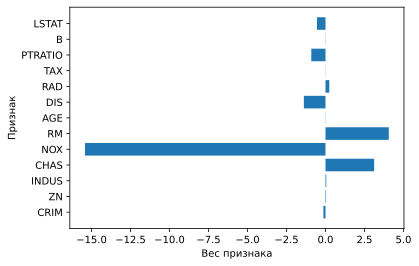

In [433]:
# Задаем размер фигуры
plt.rcParams['figure.figsize'] = 6, 4
# Задаём данные для отрисовки
plt.barh(feature_names, lr.coef_.flatten())
# Подписываем оси
plt.xlabel("Вес признака")
plt.ylabel("Признак")

plt.show()

### Задание 2
- Создайте модель под названием `model` с помощью класса `RandomForestRegressor` из модуля `sklearn.ensemble`.
- Сделайте агрумент `n_estimators` равным 1000, `max_depth` должен быть равен 12 и `random_state` сделайте равным 42.
- Обучите модель на тренировочных данных аналогично тому, как вы обучали модель `LinearRegression`, но при этом в метод `fit` вместо датафрейма `y_train` поставьте `y_train.values[:, 0]`, чтобы получить из датафрейма одномерный массив Numpy, так как для класса `RandomForestRegressor` в данном методе для аргумента y предпочтительно применение массивов вместо датафрейма.
- Сделайте предсказание на тестовых данных и посчитайте `R2`. Сравните с результатом из предыдущего задания.
- Напишите в комментариях к коду, какая модель в данном случае работает лучше.

In [434]:
from sklearn.ensemble import RandomForestRegressor

# Создадим модель с количеством деревьев в лесу 1000, с максимальной глубиной залегания дерева 12
model = RandomForestRegressor(n_estimators=1000, max_depth=12, random_state=42)

In [435]:
# Обучим модель
model.fit(X_train, y_train.values[:, 0])
# Выполним predict
y_pred_random_forest = model.predict(X_test)

Подсчитаем предсказания на тестовых данных и вычислим коэффициент [R2](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html)

In [436]:
from sklearn.metrics import r2_score

# Оценим предсказания по метрике R2 для модели RandomForestRegressor
r2_score(y_test, y_pred_random_forest)

0.87472606157312

In [437]:
# Оценим предсказания по метрике R2 для модели LinearRegression
r2_score(y_test, y_pred_linear)

0.7112260057484948

#### Вывод:
Модель регресии 'Случайный лес' предсказывает лучше, чем 'Линейная' модель регресии.

### *Задание 3
- Вызовите документацию для класса RandomForestRegressor, найдите информацию об атрибуте feature_importances_.
- С помощью этого атрибута найдите сумму всех показателей важности, установите, какие два признака показывают наибольшую важность.

In [438]:
?RandomForestRegressor.feature_importances_

Type:        property
String form: <property object at 0x0000010AB24509A0>
Docstring:  
The impurity-based feature importances.

The higher, the more important the feature.
The importance of a feature is computed as the (normalized)
total reduction of the criterion brought by that feature.  It is also
known as the Gini importance.

high cardinality features (many unique values). See
:func:`sklearn.inspection.permutation_importance` as an alternative.

Returns
-------
feature_importances_ : ndarray of shape (n_features,)
    The values of this array sum to 1, unless all trees are single node
    trees consisting of only the root node, in which case it will be an
    array of zeros.

In [439]:
print(f'Сумма всех показателей важности = {sum(model.feature_importances_)}')

Сумма всех показателей важности = 1.0


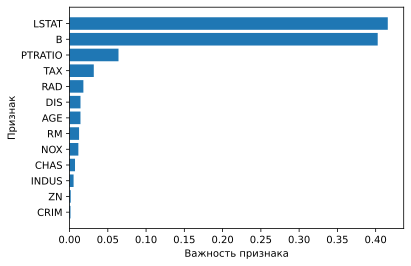

In [440]:
# Задаем размер фигуры
plt.rcParams['figure.figsize'] = 6, 4
# Задаём данные для отрисовки
plt.barh(feature_names, np.sort(model.feature_importances_))
# Подписываем оси
plt.xlabel("Важность признака")
plt.ylabel("Признак")

plt.show()

### *Задание 4
- В этом задании мы будем работать с датасетом, с которым мы уже знакомы по домашнему заданию по библиотеке `Matplotlib`, это датасет `Credit Card Fraud Detection`.Для этого датасета мы будем решать задачу классификации - будем определять,какие из транзакции по кредитной карте являются мошенническими.Данный датасет сильно несбалансирован (так как случаи мошенничества относительно редки),так что применение метрики `accuracy` не принесет пользы и не поможет выбрать лучшую модель.Мы будем вычислять `AUC`, то есть площадь под кривой `ROC`.
- Импортируйте из соответствующих модулей `RandomForestClassifier`, `GridSearchCV` и `train_test_split`.
- Загрузите датасет `creditcard.csv` и создайте датафрейм `df`.
- С помощью метода `value_counts` с аргументом `normalize=True` убедитесь в том, что выборка несбалансирована. Используя метод `info`, проверьте, все ли столбцы содержат числовые данные и нет ли в них пропусков.Примените следующую настройку, чтобы можно было просматривать все столбцы датафрейма:
```python
pd.options.display.max_columns = 100
```
- Просмотрите первые 10 строк датафрейма df.
- Создайте датафрейм `X` из датафрейма `df`, исключив столбец `Class`.
- Создайте объект `Series` под названием `y` из столбца `Class`.
- Разбейте `X` и `y` на тренировочный и тестовый наборы данных при помощи функции `train_test_split`, используя аргументы: 
```python
test_size=0.3, random_state=100, stratify=y  
```
- У вас должны получиться объекты `X_train`, `X_test`, `y_train` и `y_test`.
- Просмотрите информацию о их форме.
- Для поиска по сетке параметров задайте такие параметры:
```python
parameters = [{'n_estimators': [10, 15], 'max_features': np.arange(3, 5), 
               'max_depth': np.arange(4, 7)}]
```
- Создайте модель `GridSearchCV` со следующими аргументами:
```python
estimator=RandomForestClassifier(random_state=100),
param_grid=parameters, scoring='roc_auc', cv=3
```
- Обучите модель на тренировочном наборе данных (может занять несколько минут).
- Просмотрите параметры лучшей модели с помощью атрибута `best_params_`.
- Предскажите вероятности классов с помощью полученной модели и метода `predict_proba`.
- Из полученного результата (массив Numpy) выберите столбец с индексом 1 (вероятность класса 1) и запишите в массив `y_pred_proba`. Из модуля `sklearn.metrics` импортируйте метрику `roc_auc_score`.
- Вычислите `AUC` на тестовых данных и сравните с результатом,полученным на тренировочных данных, используя в качестве аргументов массивы `y_test` и `y_pred_proba`.

Импортируем из соответствующих модулей `RandomForestClassifier`, `GridSearchCV` и `train_test_split`

In [441]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

Загрузим датасет `creditcard.csv` и создадим датафрейм `df`. Если нет датасета `Credit Card Fraud Detection` (creditcard.csv), то скачаем его с сайта Kaggle.com по ссылке: 

[Credit Card Fraud Detection](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud)

In [442]:
# Читаем csv файл
df = pd.read_csv('./creditcard.csv', engine='python', on_bad_lines='skip')
# Зададим максимальное число отображаемых столбцов
pd.options.display.max_columns = 100
# Посмотрим первые 10 строк датафрейма
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,1.341262,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.058133,0.068653,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,-1.416907,-0.153826,-0.751063,0.167372,0.050144,-0.443587,0.002821,-0.611987,-0.045575,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,-0.619468,0.291474,1.757964,-1.323865,0.686133,-0.076127,-1.222127,-0.358222,0.324505,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,-0.705117,-0.110452,-0.286254,0.074355,-0.328783,-0.210077,-0.499768,0.118765,0.570328,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,1.017614,0.836390,1.006844,-0.443523,0.150219,0.739453,-0.540980,0.476677,0.451773,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [443]:
# Посмотрим информацию о датафрейме
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Посмотрим на сколько сбалонсирована выборка  
[8 примеров использования value_counts из Pandas](https://pythonru.com/primery/pandas-value-counts)

In [444]:
for col in df.columns:
    print(df[col].value_counts(normalize=True))

Time
163152.0    0.000126
64947.0     0.000091
68780.0     0.000088
3767.0      0.000074
3770.0      0.000070
              ...   
172760.0    0.000004
172758.0    0.000004
172757.0    0.000004
172756.0    0.000004
172754.0    0.000004
Name: proportion, Length: 124592, dtype: float64
V1
 1.245674     0.000270
 2.055797     0.000270
 2.053311     0.000218
 1.302378     0.000211
 2.040211     0.000186
                ...   
-11.881118    0.000004
-0.732789     0.000004
 1.919565     0.000004
-0.240440     0.000004
-0.425966     0.000004
Name: proportion, Length: 275663, dtype: float64
V2
 0.166975     0.000270
-0.326668     0.000270
 0.089735     0.000218
-0.606529     0.000211
-0.146975     0.000186
                ...   
 10.071785    0.000004
-0.055080     0.000004
-0.301254     0.000004
 0.530483     0.000004
 0.960523     0.000004
Name: proportion, Length: 275663, dtype: float64
V3
 0.488306    0.000270
-2.752041    0.000270
-1.681836    0.000218
-0.681986    0.000211
-2.955934    0

Выборка не сбалансирована, число операцй совершенных жуликами гораздо меньше  

Создадим датафрейм `X` из датафрейма `df`, исключив столбец `Class`

In [445]:
X = pd.DataFrame(df.drop(['Class'], axis=1))
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


Создадим объект `Series` под названием `y` из столбца `Class`

In [446]:
y = pd.Series(df['Class'])
y

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

Разобьём `X` и `y` на тренировочный и тестовый наборы данных при помощи функции `train_test_split`, используя аргументы: 
```python
test_size=0.3, random_state=100, stratify=y  
```  
[Примеры разделения датасета на train и test c Scikit-learn](https://pythonru.com/baza-znanij/sklearn-train-test-split)

In [447]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

print(f"Количество строк в y_train по классам: {np.bincount(y_train)}")
print(f"Количество строк в y_test по классам: {np.bincount(y_test)}")

Количество строк в y_train по классам: [199020    344]
Количество строк в y_test по классам: [85295   148]


In [448]:
# Посмотрим соотношение таргета в тренировочных и тестовых данных (1 и 0 должно быть поровну)
print(f'{y_train.value_counts(normalize=True) = }')
print(f'{y_test.value_counts(normalize=True) = }')

y_train.value_counts(normalize=True) = Class
0    0.998275
1    0.001725
Name: proportion, dtype: float64
y_test.value_counts(normalize=True) = Class
0    0.998268
1    0.001732
Name: proportion, dtype: float64


Посмотрим информацию о полученных данных

In [449]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199364 entries, 222925 to 271
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    199364 non-null  float64
 1   V1      199364 non-null  float64
 2   V2      199364 non-null  float64
 3   V3      199364 non-null  float64
 4   V4      199364 non-null  float64
 5   V5      199364 non-null  float64
 6   V6      199364 non-null  float64
 7   V7      199364 non-null  float64
 8   V8      199364 non-null  float64
 9   V9      199364 non-null  float64
 10  V10     199364 non-null  float64
 11  V11     199364 non-null  float64
 12  V12     199364 non-null  float64
 13  V13     199364 non-null  float64
 14  V14     199364 non-null  float64
 15  V15     199364 non-null  float64
 16  V16     199364 non-null  float64
 17  V17     199364 non-null  float64
 18  V18     199364 non-null  float64
 19  V19     199364 non-null  float64
 20  V20     199364 non-null  float64
 21  V21     19936

In [450]:
y_train.info()

<class 'pandas.core.series.Series'>
Index: 199364 entries, 222925 to 271
Series name: Class
Non-Null Count   Dtype
--------------   -----
199364 non-null  int64
dtypes: int64(1)
memory usage: 3.0 MB


In [451]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85443 entries, 262922 to 198375
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    85443 non-null  float64
 1   V1      85443 non-null  float64
 2   V2      85443 non-null  float64
 3   V3      85443 non-null  float64
 4   V4      85443 non-null  float64
 5   V5      85443 non-null  float64
 6   V6      85443 non-null  float64
 7   V7      85443 non-null  float64
 8   V8      85443 non-null  float64
 9   V9      85443 non-null  float64
 10  V10     85443 non-null  float64
 11  V11     85443 non-null  float64
 12  V12     85443 non-null  float64
 13  V13     85443 non-null  float64
 14  V14     85443 non-null  float64
 15  V15     85443 non-null  float64
 16  V16     85443 non-null  float64
 17  V17     85443 non-null  float64
 18  V18     85443 non-null  float64
 19  V19     85443 non-null  float64
 20  V20     85443 non-null  float64
 21  V21     85443 non-null  float64
 2

In [452]:
y_test.info()

<class 'pandas.core.series.Series'>
Index: 85443 entries, 262922 to 198375
Series name: Class
Non-Null Count  Dtype
--------------  -----
85443 non-null  int64
dtypes: int64(1)
memory usage: 1.3 MB


Для поиска по сетке параметров зададим такие параметры:
```python
parameters = [{'n_estimators': [10, 15], 'max_features': np.arange(3, 5), 
               'max_depth': np.arange(4, 7)}]
```

In [453]:
# Параметры для перебора
# n_estimators – число деревьев в лесу,
# max_depth – глубина дерева,
# max_features - максимальное количество признаков, которое модели случайного леса разрешается опробовать при каждом разбиении
parameters = [{'n_estimators': [10, 15], 'max_features': np.arange(3, 5), 'max_depth': np.arange(4, 7)}]

Создадим модель `GridSearchCV` со следующими аргументами:
```python
estimator=RandomForestClassifier(random_state=100),
param_grid=parameters, scoring='roc_auc', cv=3
```

In [454]:
# Создаём модель кросс валидация = 3, метрика = 'roc_auc'
clf = GridSearchCV(estimator=RandomForestClassifier(random_state=100), param_grid=parameters, scoring='roc_auc', cv=3)

Обучим модель на тренировочном наборе данных (может занять несколько минут)

In [455]:
# Обучим модель на тренировочных данных
clf.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=100),
             param_grid=[{'max_depth': array([4, 5, 6]),
                          'max_features': array([3, 4]),
                          'n_estimators': [10, 15]}],
             scoring='roc_auc')

Для ознакомления с результатами Grid search можно использовать атрибут `.cv_results_`. Удобнее всего визуализировать эти результаты в виде `DataFrame`:

In [456]:
cv_results = pd.DataFrame(clf.cv_results_)

cv_results.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_max_features', 'param_n_estimators', 'params',
       'split0_test_score', 'split1_test_score', 'split2_test_score',
       'mean_test_score', 'std_test_score', 'rank_test_score'],
      dtype='object')

Посмотрим, как выбранные нами параметры влияют на точность модели:

In [457]:
param_columns = [
    column
    for column in cv_results.columns
    if column.startswith('param_')
]

score_columns = ['mean_test_score']

cv_results = (cv_results[param_columns + score_columns]
              .sort_values(by=score_columns, ascending=False))

cv_results.head(10)

,param_max_depth,param_max_features,param_n_estimators,mean_test_score
9,6,3,15,0.965969
7,5,4,15,0.962597
6,5,4,10,0.960201
11,6,4,15,0.959975
10,6,4,10,0.956352
3,4,4,15,0.955851
8,6,3,10,0.954698
5,5,3,15,0.949443
4,5,3,10,0.949299
2,4,4,10,0.941082


Мы видим, что наилучшей точности модель достигает, если взять 15 деревьев глубины не более 6, и на каждом из них выбирать не более 3 признаков. 

Наилучшие параметры можно также посмотреть, используя атрибут `.best_params_`.

In [458]:
clf.best_params_

{'max_depth': np.int64(6), 'max_features': np.int64(3), 'n_estimators': 15}

Полученная в результате модель аналогична такой модели:
```python
clf = RandomForestClassifier(max_depth=6, max_features=3, n_estimators=15)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
```

Предскажем вероятности классов с помощью полученной модели и метода `predict_proba`  
первый столбец вероятность, что 'predict' равен 0  
второй столбец вероятность, что 'predict' равен 1

In [459]:
y_pred_proba = clf.predict_proba(X_test)
y_pred_proba

array([[9.99070828e-01, 9.29171738e-04],
       [9.99704794e-01, 2.95206364e-04],
       [9.99717846e-01, 2.82154033e-04],
       ...,
       [9.99717846e-01, 2.82154033e-04],
       [9.99317795e-01, 6.82204754e-04],
       [9.87539019e-01, 1.24609813e-02]])

Из полученного результата (массив Numpy) выберем столбец с индексом 1 (вероятность класса 1) и запишем в массив `y_pred_proba` 

In [460]:
y_pred_proba = y_pred_proba[:, 1]

print(y_pred_proba[:5])

[0.00092917 0.00029521 0.00028215 0.00028215 0.00028215]


Из модуля `sklearn.metrics` импортируем метрику `roc_auc_score`

In [461]:
from sklearn.metrics import roc_auc_score

Вычислим `AUC` на тестовых данных и сравним с результатом,полученным на тренировочных данных, используя в качестве аргументов массивы `y_test` и `y_pred_proba`.  
Понравился [интерактивный гафик](http://www.navan.name/roc/) поясняющий суть ROC AUC

In [462]:
# Вычислим AUC на тестовых данных
auc = roc_auc_score(y_test, y_pred_proba)
# Возмем вычисленный AUC на тренировочных данных
auc_train = max(clf.cv_results_['mean_test_score'])

print(f'AUC на тестовых данных:      {np.round(auc, 5)}\n'
      f'AUC на тренировочных данных: {np.round(auc_train, 5)}')

AUC на тестовых данных:      0.94627
AUC на тренировочных данных: 0.96597


Вывод: AUC на тренировочных данных немного выше, чем на тестовых. В обоих случаях, метрика выше 0.9 - Хорошее разделение классов.

### *Дополнительные задания:

#### 1) Загрузите датасет Wine из встроенных датасетов sklearn.datasets с помощью функции [load_wine](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html) в переменную data.

In [463]:
from sklearn.datasets import load_wine
data = load_wine()

#### 2) Полученный датасет не является датафреймом. Это структура данных, имеющая ключи аналогично словарю. Просмотрите тип данных этой структуры данных и создайте список `data_keys`, содержащий ее ключи.

In [464]:
type(data)

sklearn.utils._bunch.Bunch

In [465]:
data_keys = data.keys()
data_keys

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

#### 3) Просмотрите данные, описание и названия признаков в датасете. Описание нужно вывести в виде привычного, аккуратно оформленного текста, без обозначений переноса строки, но с самими переносами и т.д.

In [466]:
# Посмотрим, что за данные в data
data["data"]

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [467]:
# Посмотрим размерность
data["data"].shape

(178, 13)

In [468]:
# Посмотрим, что за данные в target
data["target"]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [469]:
# Посмотрим, что за данные в frame
data["frame"]

In [470]:
# Посмотрим, что за данные в target_names
data["target_names"]

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [471]:
# Посмотрим описание датасета
print(data["DESCR"])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

:Number of Instances: 178
:Number of Attributes: 13 numeric, predictive attributes and the class
:Attribute Information:
    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
    - class:
        - class_0
        - class_1
        - class_2

:Summary Statistics:

============================= ==== ===== ======= =====
                                Min   Max   Mean     SD
============================= ==== ===== ======= =====
Alcohol:                      11.0  14.8    13.0   0.8
Malic Acid:                   0.74  5.80    2.34  1.12
Ash:                          1.36  3.23    2.36  0.27
Alcalinity of Ash:            10.6  30.0    19.5   3.3
Magnesium:                    70.0 162.0    99.7  14.3

In [472]:
# Посмотрим, что за данные в feature_names
data["feature_names"]

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

#### 4) Сколько классов содержит целевая переменная датасета? Выведите названия классов.

In [473]:
# Посмотрим сколько классов в целевой переменной
pd.DataFrame(data["target"]).value_counts()

0
1    71
0    59
2    48
Name: count, dtype: int64

In [474]:
# Выведем название классов
print(data["target_names"])

['class_0' 'class_1' 'class_2']


В целевой переменной 3 класса с названием 'class_0', 'class_1', 'class_2'

#### 5) На основе данных датасета (они содержатся в двумерном массиве Numpy) и названий признаков создайте датафрейм под названием `X`.

In [475]:
X = pd.DataFrame(data['data'], columns=data['feature_names'])
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


#### 6) Выясните размер датафрейма `X` и установите, имеются ли в нем пропущенные значения.

In [476]:
# Узнаем размер датафрейма
X.shape

(178, 13)

In [477]:
# Посчитаем пропущенные значения
X.isnull().sum(axis=0)

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

In [478]:
# Посмотрим инфу
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

#### 7) Добавьте в датафрейм поле с классами вин в виде чисел, имеющих тип данных `numpy.int64`. Название поля - 'target'.

In [479]:
X['target'] = pd.DataFrame(data["target"], dtype=np.int64)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

#### 8) Постройте матрицу корреляций для всех полей `X`. Дайте полученному датафрейму название `X_corr`

In [480]:
X_corr = X.corr()
X_corr

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720,-0.328222
malic_acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011,0.437776
ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626,-0.049643
alcalinity_of_ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597,0.517859
magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351,-0.209179
total_phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115,-0.719163
flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193,-0.847498
nonflavanoid_phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385,0.489109
proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417,-0.499130
color_intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100,0.265668


#### 9) Создайте список `high_corr` из признаков, корреляция которых с полем `target` по абсолютному значению превышает 0.5 (причем, само поле `target` не должно входить в этот список)

In [481]:
high_corr = [col for col in X_corr.columns if (X_corr['target'][col]>0.5) and not(col == 'target')]
high_corr

['alcalinity_of_ash']

#### 10) Удалите из датафрейма `X` поле с целевой переменной. Для всех признаков, названия которых содержатся в списке `high_corr`, вычислите квадрат их значений и добавьте в датафрейм `X` соответствующие поля с суффиксом '_2', добавленного к первоначальному названию признака. Итоговый датафрейм должен содержать все поля, которые, были в нем изначально, а также поля с признаками из списка `high_corr`, возведенными в квадрат. Выведите описание полей датафрейма `X` с помощью метода `describe`.

In [482]:
X.drop(['target'], axis=1, inplace=True)
for col in high_corr:
    X[col+'_2'] = X[col]**2

X.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,alcalinity_of_ash_2
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,391.142865
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,133.671775
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,112.360000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,295.840000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,380.250000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,462.250000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,900.000000
